# 難度(詐欺)
# 作者
# 精準度
# 難度趨勢
# 時長趨勢
# 算分

# 貝茲曲線

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def B(t,p): 
    if t==1:return p[-1] 
    c=1 
    v=0 
    n=len(p)-1
    t_=t/(1-t) 
    tt=(1-t)**n
    for i in range(n+1):
        v+=c*tt*p[i] 
        tt*=t_
        c*=(n-i)/(i+1) 
    return v


遊戲內的歌曲有152首，其中有93個不同的作者
作者為mothy       的歌似乎都會打得比較好,平均pp=106.64
作者為cosMo@暴走P 的歌似乎都會死得很慘,平均pp=48.97
メルト 是遊戲裡最長的歌 時長182秒
初音天地開闘神話 是遊戲裡combo數最多的歌 總共有2021個combo
這一輪刷下來，打了152首歌，我總共點了157373次，至少花了300分鐘，
成果: pp高於90的有81首，有47首歌FC(full combo)，1首歌AP(all perfect),一次就達成皆伝2星稱號！


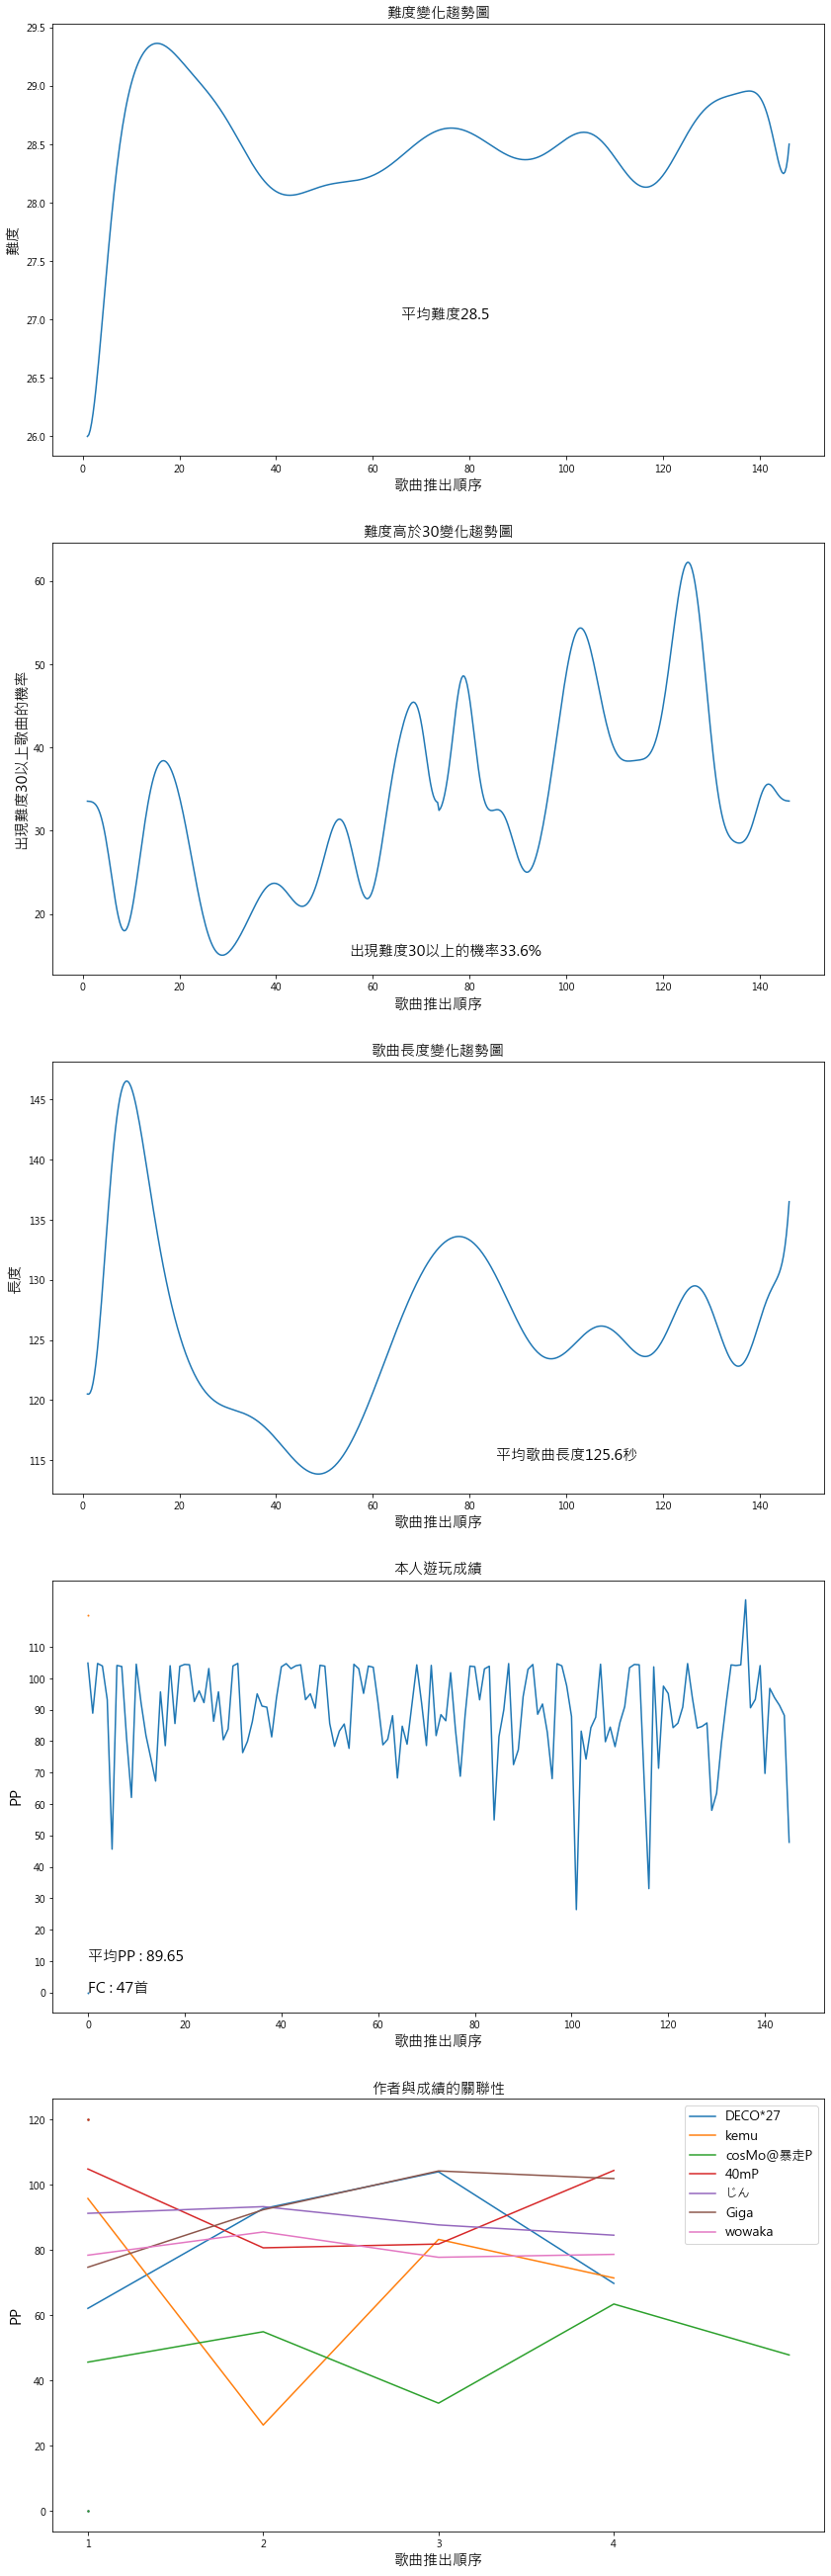

In [35]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
class _song:
    def _init_(self):
        self.name=""
        self.author1=""
        self.author2=""
        self.level=0
        self.length=0
        self.combos=0
        self.perfect=0
        self.great=0
        self.good=0
        self.bad=0
        self.miss=0
        self.img_path=""
    def maxcombo(self):
        return self.perfect+self.great+self.good+self.bad+self.miss
    def ap(self):
        return self.great+self.good+self.bad+self.miss==0
    def fc(self):
        return self.good+self.bad+self.miss==0
    def pp(self):
        return 80*(1-
                    10*self.miss/self.maxcombo()-
                    8*self.bad/self.maxcombo()-
                    6*self.good/self.maxcombo()-
                    self.great/self.maxcombo()
                    )+self.ap()*20+self.fc()*5+20*self.combos/self.maxcombo()
def find(s):
    for i in range(len(song)):
        if s==song[i].name:
            return i
    return -1
def B(t,p): 
    if t==1:return p[-1] 
    c=1 
    v=0 
    n=len(p)-1
    t_=t/(1-t) 
    tt=(1-t)**n
    for i in range(n+1):
        v+=c*tt*p[i] 
        tt*=t_
        c*=(n-i)/(i+1) 
    return v
database=open('data\Tdata.txt','r',encoding='utf-8')
wholetxt=database.read()
wholetxt=wholetxt[5:].split('-----')
song=[]
a=1
for splitdata in wholetxt:
    if(len(splitdata)>5):
        part=splitdata.split('\n')
        part.pop(0)
        song[i].name   =part[0][:-1]
        song[i].author1=part[1][3:]
        song[i].author2=part[2][3:]
        song[i].length =int(part[ 3][7:-1])-19
        song[i].level  =int(part[ 4][6:])
        song[i].combos =int(part[ 5][9:])
        song[i].perfect=int(part[ 7][9:])
        song[i].great  =int(part[ 8][9:])
        song[i].good   =int(part[ 9][9:])
        song[i].bad    =int(part[10][9:])
        song[i].miss   =int(part[11][9:])
    else:
        i=int(splitdata)
        song.append(_song())
plt.rcParams['font.family']="Microsoft JhengHei" ##"DFKai-SB"
nfigs=5
k=14
fig,ax=plt.subplots(figsize=(k,k*nfigs*2/3),nrows=nfigs)
nums=500
###############難度變化趨勢圖##################
x=[i for i in np.linspace(1,len(song),nums)]
n=2
y=np.array([sum([j.level for j in song[i:i+n]]) for i in range(len(song)//n)],dtype=np.float32)
y/=n
y=[B(t,y)for t in np.linspace(0,1,nums)]
ax[0].set_xlabel('歌曲推出順序',fontsize=15)
ax[0].set_ylabel('難度',fontsize=15)
ax[0].set_title('難度變化趨勢圖',fontsize=15)
ax[0].annotate("平均難度%.1f"%(sum(y)/len(y)),xy=(75,27),ha='center',fontsize=15)
ax[0].plot(x,y)
###############高於30 難度變化趨勢圖##################

x=[i for i in np.linspace(1,len(song),nums)]
y=[0 if i.level<30 else 100 for i in song]
mid=sum(y)/len(y)
for i in range(10):
    y.insert(0,mid)
    y.insert(len(y)//2,mid)
    y.append(mid)
y1=[B(t,y[:len(y)//2])for t in np.linspace(5/len(y),1-5/len(y),nums//2)]
y2=[B(t,y[len(y)//2:])for t in np.linspace(5/len(y),1-5/len(y),nums//2)]
y1.extend(y2)
y=y1
ax[1].set_xlabel('歌曲推出順序',fontsize=15)
ax[1].set_ylabel('出現難度30以上歌曲的機率',fontsize=15)
ax[1].set_title('難度高於30變化趨勢圖',fontsize=15)
ax[1].annotate("出現難度30以上的機率%.1f"%mid+'%',xy=(75,15),ha='center',fontsize=15)
ax[1].plot(x,y)
###############歌曲長度變化趨勢圖##################
x=[i for i in np.linspace(1,len(song),nums)]
n=2
y=np.array([sum([j.length for j in song[i:i+n]]) for i in range(len(song)//n)],dtype=np.float32)
y/=n
y=[B(t,y)for t in np.linspace(0,1,nums)]
ax[2].set_xlabel('歌曲推出順序',fontsize=15)
ax[2].set_ylabel('長度',fontsize=15)
ax[2].set_title('歌曲長度變化趨勢圖',fontsize=15)
ax[2].annotate("平均歌曲長度%.1f秒"%(sum(y)/len(y)),xy=(100,115),ha='center',fontsize=15)
ax[2].plot(x,y)
###############遊玩成績##################
# 初音ミクの消失
# 初音ミクの激唱
# 六兆年と一夜物語
# マシンガンポエムドール
# エンドマークに希望と涙を添えて

x=range(len(song))
y=[i.pp() for i in song]
ax[3].set_yticks(range(0,120,10))
ax[3].set_xlabel('歌曲推出順序',fontsize=15)
ax[3].set_ylabel('PP',fontsize=15)
ax[3].set_title("本人遊玩成績",fontsize=15)
ax[3].annotate("平均PP : %.2f"%(sum(y)/len(y)),xy=(0,10),fontsize=15)
ax[3].annotate("FC : %d首"%(sum([i.fc()for i in song])),xy=(0,0),fontsize=15)
ax[3].plot(x,y)
ax[3].scatter(0,0,s=1)
ax[3].scatter(0,120,s=1)
############分析作者與成績的關係###############
au=list(set([i.author2 for i in song]))
pps=[]
hard=33
for j in au:
    asong=[]
    for i in song:
        if i.author2==j:
            asong.append(i)
    y=[i.pp() for i in asong]
    if len(asong)>=4 :
        ax[4].set_xlabel('歌曲推出順序',fontsize=15)
        ax[4].set_xticks(range(1,len(asong)+1))
        ax[4].set_ylabel('PP',fontsize=15)
        ax[4].set_title("作者與成績的關聯性",fontsize=15)
        ax[4].scatter(1,0,s=1)
        ax[4].scatter(1,120,s=1)
        ax[4].plot(range(1,len(asong)+1),y,label=j)
    pps.append(j)
    pps.append(sum(y)/len(y))
plt.legend(fontsize=13)
maxpp=max(pps[1::2])
minpp=min(pps[1::2])
print("遊戲內的歌曲有%d首，其中有%d個不同的作者"%(len(song)+6,len(au)))
print("作者為%s       的歌似乎都會打得比較好,平均pp=%.2f"%(pps[pps.index(maxpp)-1],maxpp))
print("作者為%s 的歌似乎都會死得很慘,平均pp=%.2f"%(pps[pps.index(minpp)-1],minpp))
maxtime=max([i.length for i in song])
maxcombo=max([i.maxcombo() for i in song])
for i in song:
    if i.maxcombo()==maxcombo:
        print(i.name+" 是遊戲裡combo數最多的歌 總共有%d個combo"%maxcombo)
    if i.length==maxtime:
        print(i.name+" 是遊戲裡最長的歌 時長%d秒"%maxtime)
fc=sum([i.fc() for i in song])
ap=sum([i.ap() for i in song])
print("""這一輪刷下來，打了%d首歌，我總共點了%d次，至少花了%d分鐘，
成果: pp高於90的有%d首，有%d首歌FC(full combo)，%d首歌AP(all perfect),一次就達成皆伝%d星稱號！"""%(
len(song)+6,sum([i.maxcombo() for i in song]),sum([i.length for i in song])//60+1,sum([i.pp()>90 for i in song]),fc,ap,fc//10-2))

database.close()

In [23]:
s="cosMo@暴走P"
for i in song:
    if i.author2==s:
        print(i.name,"master%d"%i.level)

初音ミクの消失 master33
初音ミクの激唱 master33
マシンガンポエムドール master33
初音天地開闘神話 master32
エンドマークに希望と涙を添えて master34


In [22]:
for i in range(1,len(pps),2):
    for j in range(1,len(pps)-2,2):
        if(pps[j]<pps[j+2]):
            autemp=pps[j-1]
            pptemp=pps[j]
            pps[j-1]=pps[j+1]
            pps[j]=pps[j+2]
            pps[j+1]=autemp
            pps[j+2]=pptemp
for i in range(0,len(pps),2):
    print("%s做的歌 平均pp%.2f"%(pps[i],pps[i+1]))

mothy做的歌 平均pp106.64
Dixie Flatline做的歌 平均pp104.76
164做的歌 平均pp104.71
Sasanomaly做的歌 平均pp104.66
EasyPop做的歌 平均pp104.51
aqu3ra做的歌 平均pp104.50
ナノウ做的歌 平均pp104.44
ササノマリイ做的歌 平均pp104.32
iroha(sasaki)做的歌 平均pp104.31
まらしぃ做的歌 平均pp104.31
EZFG做的歌 平均pp104.30
OSTER project做的歌 平均pp104.17
はるまきごはん做的歌 平均pp104.17
halyosy做的歌 平均pp104.11
TOKOTOKO做的歌 平均pp104.08
煮ル果実做的歌 平均pp103.97
夏代孝明做的歌 平均pp103.95
さつき　が　てんこもり做的歌 平均pp103.94
koyori做的歌 平均pp103.91
YASUHIRO(康寛)做的歌 平均pp103.90
ジミーサムP做的歌 平均pp103.86
バルーン做的歌 平均pp103.83
ピノキオピー做的歌 平均pp103.80
柊キライ做的歌 平均pp103.71
かいりきベア做的歌 平均pp103.66
n-buna做的歌 平均pp103.08
梅とら做的歌 平均pp103.01
Kanaria做的歌 平均pp102.89
kz做的歌 平均pp99.97
みきとP做的歌 平均pp99.73
藤原基央做的歌 平均pp99.20
Junky做的歌 平均pp98.08
夏代孝明＆渡辺拓也做的歌 平均pp97.64
有機酸做的歌 平均pp97.53
てにをは做的歌 平均pp96.81
Picon做的歌 平均pp95.80
Eve做的歌 平均pp95.52
R Sound Design做的歌 平均pp95.22
takamatt做的歌 平均pp95.16
ゆよゆっぺ做的歌 平均pp95.08
まふまふ做的歌 平均pp94.71
ryo做的歌 平均pp94.32
Dios&シグナルP做的歌 平均pp93.80
すりい做的歌 平均pp93.24
Giga做的歌 平均pp93.22
ika_mo做的歌 平均pp93.16
40mP做的歌 平均pp92.85
針原翼(はりーP)做的歌 平均pp92.42
yu

In [ ]:
import cv2
import matplotlib.pyplot as plt
import sys
import pyocr
import os
import numpy as np
from PIL import Image
import pytesseract
import pyocr.builders
from time import *
class _song:
    def _init_(self):
        self.name=""
        self.author1=""
        self.author2=""
        self.level=0
        self.length=0
        self.combos=0
        self.perfect=0
        self.great=0
        self.good=0
        self.bad=0
        self.miss=0
        self.img_path=""
pyocr.tesseract.TESSERACT_CMD = r"D:\program file\ocr\tesseract.exe"
tools = pyocr.get_available_tools()
#print(pyocr.tesseract.get_version())
tool = tools[0]
filepath="data"
scale=0.7
files=os.listdir(filepath)
song=[]#存放歌的各種資料的class
ctr=0
a=1
database=open('data\Tdata.txt','w',encoding="utf-8")
startname="0"
for file in files:
    if file<startname:
        continue
    if a:
        print(file)
    
    img=cv2.imread(os.path.join(filepath,file))
    img=cv2.resize(img,(int(2340*scale),int(1080*scale)))
    status_table = Image.fromarray(img[445:640,820:930,:])
    statustext = tool.image_to_string(status_table,lang = 'chi_tra',builder=pyocr.builders.DigitBuilder())
    if a:
        starttime=file[-13:-7]
        starttime=int(starttime[:2])*3600+int(starttime[2:4])*60+int(starttime[4:])
        song.append(_song())
        cv2.rectangle(img,(622,485),(1015,95),(255, 255, 255),2)#縮圖位置
        cv2.rectangle(img,(500,650),(1142,607),(255, 255, 255),2)#作詞/曲者位置
        cv2.rectangle(img,(550,600),(1092,553),(255, 255, 255),2)#歌名位置
        author = Image.fromarray(img[607:650,500:1142,:])
        song_name = Image.fromarray(img[553:600,550:1092,:])
        authortext = tool.image_to_string(author,lang = 'jpn',builder=pyocr.builders.TextBuilder())
        song_nametext = tool.image_to_string(song_name,lang = 'jpn',builder=pyocr.builders.TextBuilder())
        song_nametext+=' .'
        authortext+=' : : : '
        if ord(song_nametext[1])>ord('a') and ord(song_nametext[1])<ord('z') or ord(song_nametext[0])>ord('A') and ord(song_nametext[0])<ord('Z'):
            print('English song name')
        else:
            song_nametext=song_nametext.replace(' ','')
        for i in range(len(song_nametext)):
            if song_nametext[i] in ["\\","/",":","*",'"','|','<','>','\n']:
                song_nametext=song_nametext.replace(song_nametext[i],'_')
        authortext=authortext.split(':')
        authortext[1]=authortext[1].replace('作曲','')
        authortext[1]=authortext[1].replace(' ','')
        authortext[2]=authortext[2].replace('編曲','')
        authortext[2]=authortext[2].replace(' ','')
        song[ctr].name=song_nametext
        song[ctr].author1=authortext[1]
        song[ctr].author2=authortext[2]
        song[ctr].img_path="thumbnail\%s.jpg"%song_nametext
        plt.imsave("thumbnail\%s.jpg"%song_nametext,img[95:485,622:1015,:])
    else:
        endtime=file[-13:-7]
        endtime=int(endtime[:2])*3600+int(endtime[2:4])*60+int(endtime[4:])
        song[ctr].length=endtime-starttime
        combos = Image.fromarray(img[445:640,300:640,:])
        cv2.rectangle(img,(820,640),(930,445),(255, 255, 255),2)
        cv2.rectangle(img,(300,640),(640,445),(0, 0, 255),2)
        combostext = tool.image_to_string(combos,lang = 'eng',builder=pyocr.builders.DigitBuilder())
        statustext=statustext.split('\n')
        if len(statustext)<5:
            print("%d. can't identify %s"%(ctr,song[ctr].name))
        if '.' in combostext:
               combostext=combostext.replace('.','')
        for i in range(len(statustext)):
            if '.' in statustext[i]:
                statustext[i]=statustext[i].replace('.','')
        for i in range(5):
            statustext.append("0")
        
        song[ctr].combos=int(combostext)
        song[ctr].perfect=int(statustext[0])
        song[ctr].great=int(statustext[1])
        song[ctr].good=int(statustext[2])
        song[ctr].bad=int(statustext[3])
        song[ctr].miss=int(statustext[4])
        print("-----%d-----"%ctr)
        print(song[ctr].name)
        print("作詞："+song[ctr].author1)
        print("作曲："+song[ctr].author2)
        print("length:%ds"%song[ctr].length)
        print("maxcombo:%d"%song[ctr].combos)
        print("status:")
        print("%-9s%d"%("perfect",song[ctr].perfect))
        print("%-9s%d"%("great",song[ctr].great))
        print("%-9s%d"%("good",song[ctr].good))
        print("%-9s%d"%("bad",song[ctr].bad))
        print("%-9s%d"%("miss",song[ctr].miss))
        database.write("-----%d-----\n"%ctr)
        database.write(song[ctr].name+'\n')
        database.write("作詞："+song[ctr].author1+'\n')
        database.write("作曲："+song[ctr].author2+'\n')
        database.write("length:%ds\n"%song[ctr].length)
        database.write("maxcombo:%d\n"%song[ctr].combos)
        database.write("status:\n")
        database.write("%-9s%d\n"%("perfect",song[ctr].perfect))
        database.write("%-9s%d\n"%("great",song[ctr].great))
        database.write("%-9s%d\n"%("good",song[ctr].good))
        database.write("%-9s%d\n"%("bad",song[ctr].bad))
        database.write("%-9s%d\n"%("miss",song[ctr].miss))
        
    cv2.imshow('std',img)
    a^=1
    ctr+=a
    if(cv2.waitKey(1)&0xFF==ord('q')):
        break
    #cv2.waitKey(1)
    
while(1):
    if(cv2.waitKey(1)&0xFF==ord('q')):
        break
database.close()
cv2.destroyAllWindows()

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


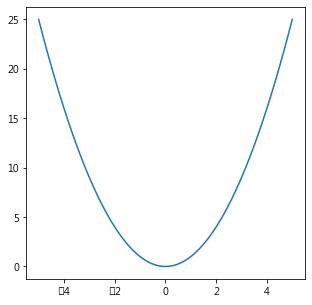

In [29]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return x**2
x=np.linspace(-5,5,1000)
y=[f(i) for i in x]
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,y)